# Compare Psytrack Regressors to Model with Additional Prev Violation 

**Goal**: Given the new dataset thresholded to only trained data, assess if a previous violation improves the model. 

Given previous results on the truncated violtionation dataset, I hypothesize that model fit be better when prev violation history is included.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

from multiglm.experiments.experiment import load_experiment
from multiglm.experiments.experiment_compare_models import ExperimentCompareModels
from multiglm.models.multiclass_logistic_regression import MultiClassLogisticRegression
from multiglm.visualizations.model_visualizer import ModelVisualizerCompare
from multiglm.features.design_matrix_generator import DesignMatrixGeneratorFilteredHistory
from multiglm.data import ANIMAL_IDS

sns.set_context("talk")
%load_ext autoreload
%autoreload 2


In [8]:
model_config = {
    "psytrack_features": {  # MODEL 1
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": -1},  # no filter & drop column
    },
    "prev_violation": {  # MODEL 2
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {"prev_violation": 0},  # no filter
    },
    "filter_prev_violation": {  # MODEL 3
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": DesignMatrixGeneratorFilteredHistory,
        "filter_implementation": {
            "prev_violation": 1
        },  # filter column with animals tau
    },
}


params = {
    "animals": ANIMAL_IDS,
    "data_type": "new_trained",
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "null_mode": "multi",
    "eval_train": True,
    "tau_columns": ["prev_violation"],
    "model_config": model_config,
}

save_name = "2024_02_17_compare_filtered_prev_violation.pkl"
ORDER = ["psytrack_features", "prev_violation", "filter_prev_violation"]

In [3]:
experiment = ExperimentCompareModels(params)
experiment.run()
experiment.save(save_name)

Loading dataset type : new_trained
Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']

 >>>> evaluating animal W051 <<<<

 ***** evaluating model psytrack_features w/ sigma 0.07 *****
         Current function value: 64995.381417
         Iterations: 24
         Function evaluations: 103
         Gradient evaluations: 91

 ***** evaluating model psytrack_features w/ sigma 0.13 *****
Optimization terminated successfully.
         Current function value: 64759.621627
         Iterations: 25
         Function evaluations: 38
         Gradient evaluations: 38

 ***** evaluating model psytrack_features w/ sigma 0.25 *****
         Current function value: 64687.335386
         Iterations: 24
         Function evaluations: 103
         Gradient evaluations: 90

 ***** evaluating model psytrack_features w/ sigma 0.5 *****
         Current function value: 64667.068595
         Ite

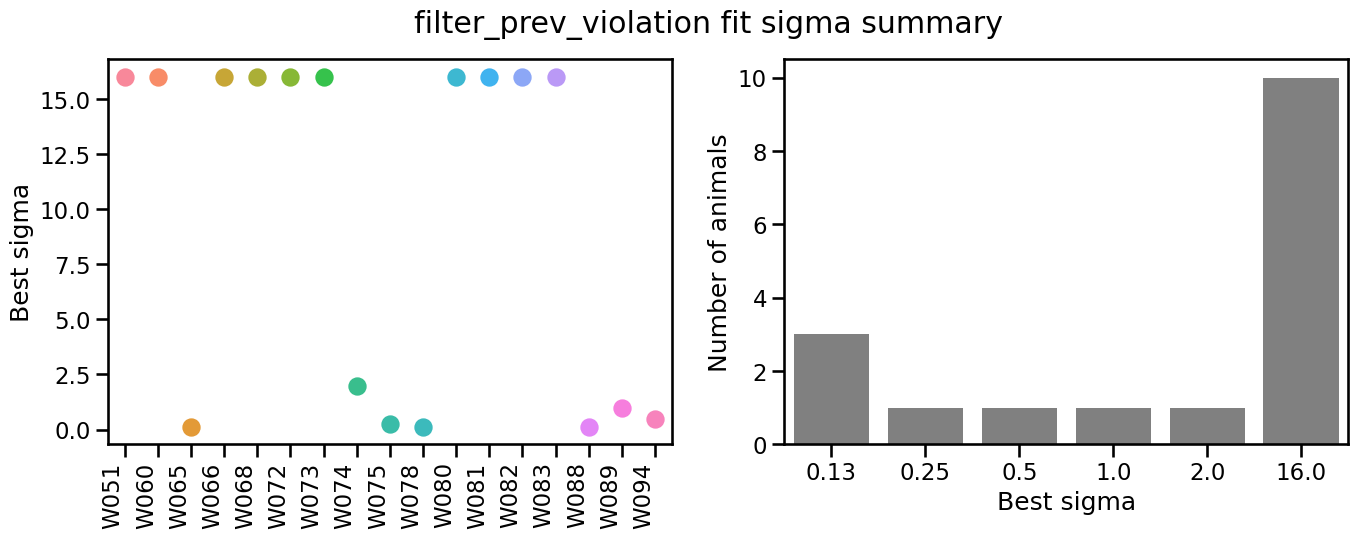

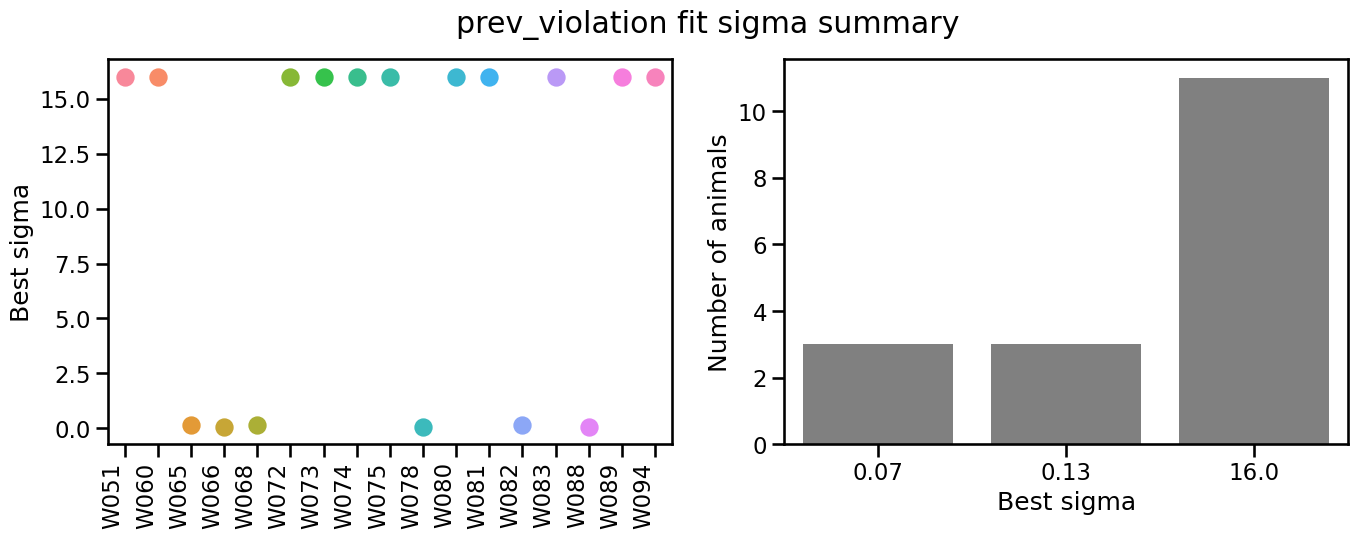

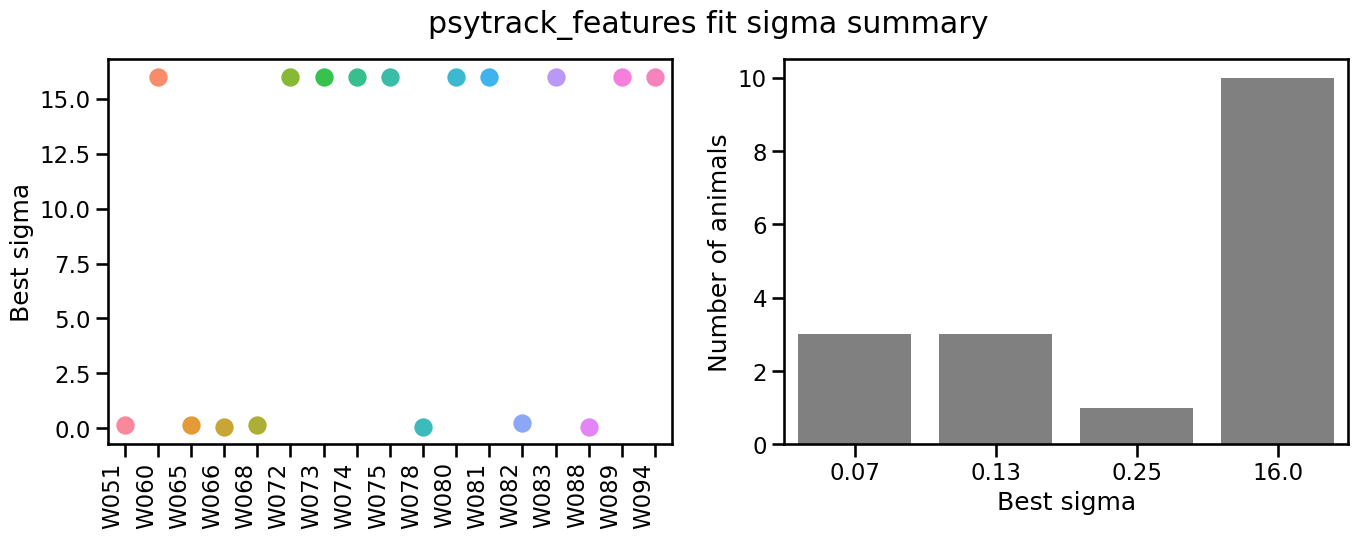

In [6]:
experiment = load_experiment(save_name)
mvc = ModelVisualizerCompare(experiment)
df = mvc.find_best_fit(group="model_name")
for model_name, model_df in df.groupby("model_name"):
    mvc.plot_sigma_summary(model_df, title=f"{model_name} fit sigma summary")

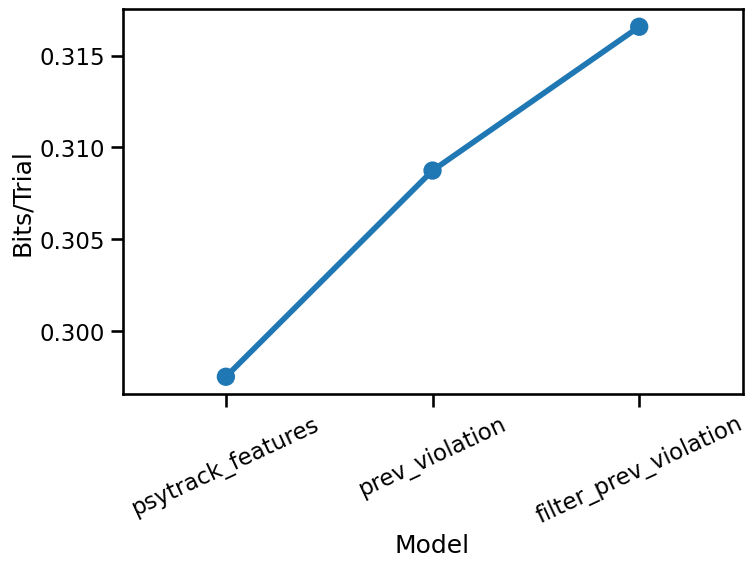

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
mvc.plot_model_comparison(
    hue=None,
    ax=ax,
    order=ORDER,
    errorbar=None,
)

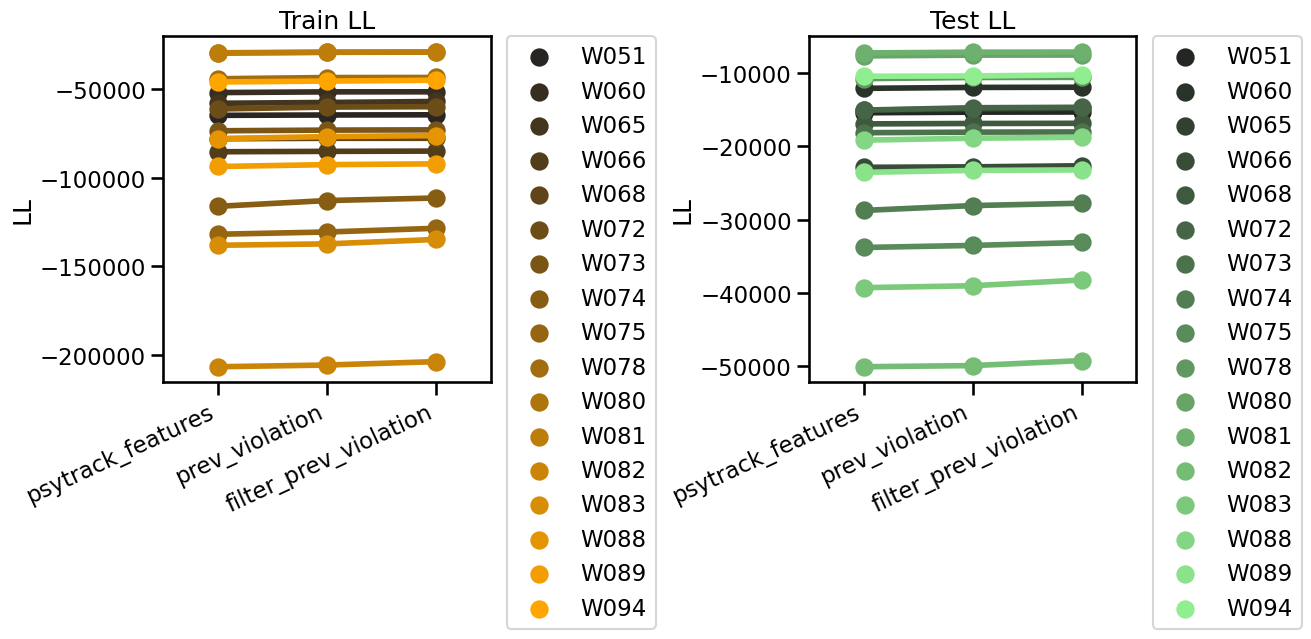

In [14]:
mvc.plot_train_and_test_ll(
    order=ORDER,
    hue="animal_id",
)

<Axes: title={'center': 'Model Improvement- mu: 362.74 std: 325.46 \n psytrack_features -> filter_prev_violation'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

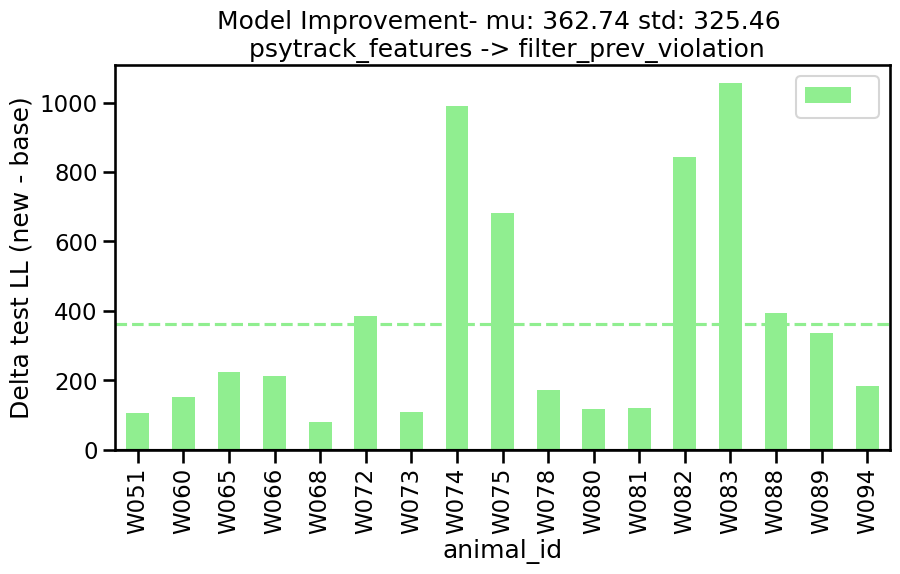

In [15]:
mvc.plot_ll_delta_by_animal(
    base_model_name="psytrack_features",
    new_model_name="filter_prev_violation",
    type="test",
)

<Axes: title={'center': 'Model Improvement- mu: 177.72 std: 238.67 \n prev_violation -> filter_prev_violation'}, xlabel='animal_id', ylabel='Delta test LL (new - base)'>

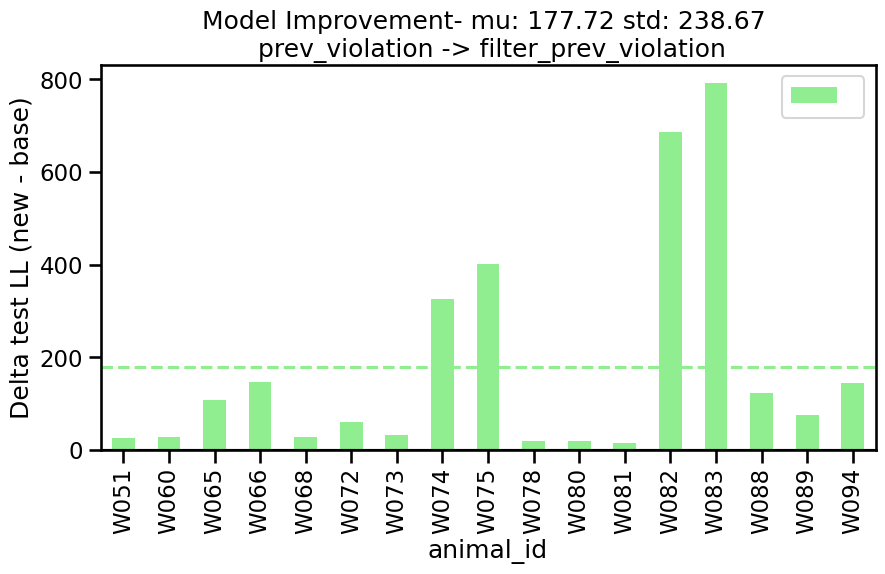

In [16]:
mvc.plot_ll_delta_by_animal(
    base_model_name="prev_violation",
    new_model_name="filter_prev_violation",
    type="test",
)

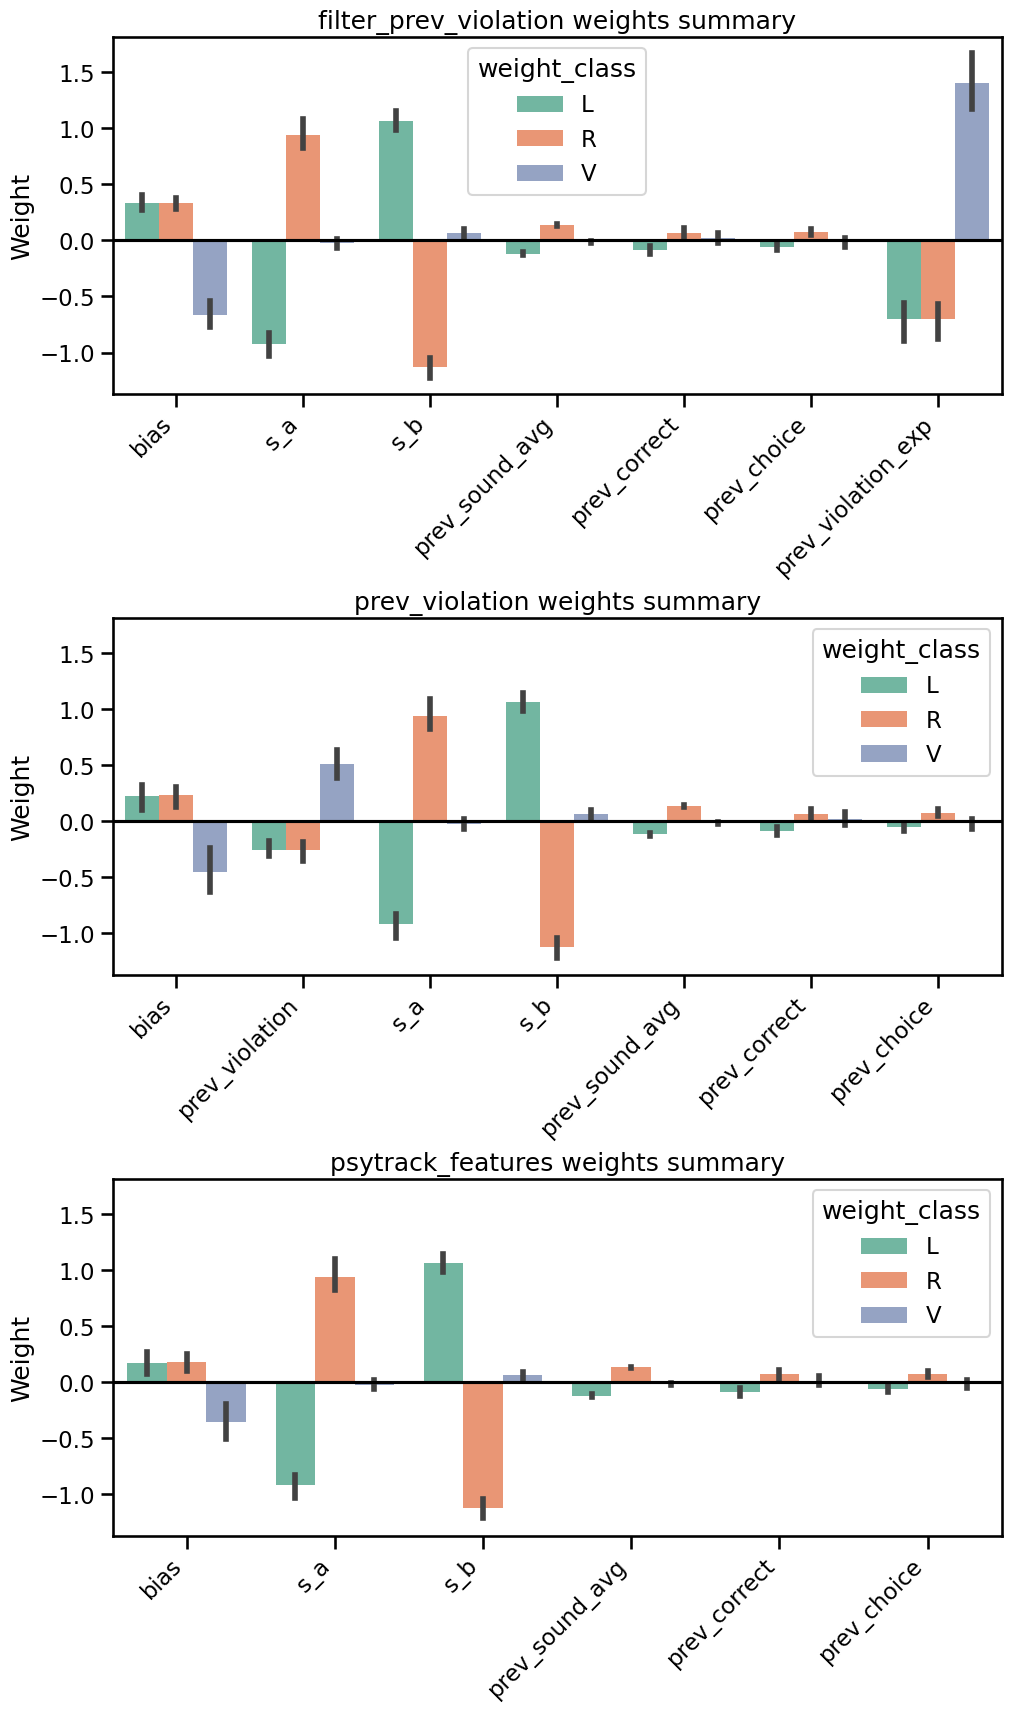

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(10, 17), constrained_layout=True, sharey=True)

best_fit_by_model = mvc.find_best_fit(group=["animal_id", "model_name"])

for ii, (model_name, model_df) in enumerate(best_fit_by_model.groupby("model_name")):
    unpacked = mvc.unpack_features_and_weights(model_df)

    mvc.plot_weights_summary(
        df=unpacked,
        ax=ax[ii],
        palette="Set2",
        title=f"{model_name} weights summary",
    )

break

#TODO  plot delta LL by tau, plot delta LL by violation rate, by prev violation exp weight

In [20]:
# TODO- put the follwing into a plotting function plot_delta_ll_by_train_test_size()

In [22]:
d.reset_index()

model_name,animal_id,filter_prev_violation,prev_violation,psytrack_features,delta_ll
0,W051,15272.679808,15297.451366,15379.882403,82.431037
1,W060,11883.093128,11910.731361,12034.287723,123.556362
2,W065,14780.204602,14887.324255,15004.874279,117.550023
3,W066,22641.841986,22788.642254,22853.686117,65.043863
4,W068,16823.114599,16849.572356,16904.254547,54.682191
5,W072,14631.875696,14690.900652,15015.806053,324.905401
6,W073,18004.293650,18035.964658,18112.250602,76.285944
7,W074,27767.694303,28092.531281,28758.451938,665.920657
8,W075,33148.198911,33550.328511,33831.349656,281.021146
9,W078,10530.805105,10548.738398,10704.250903,155.512505


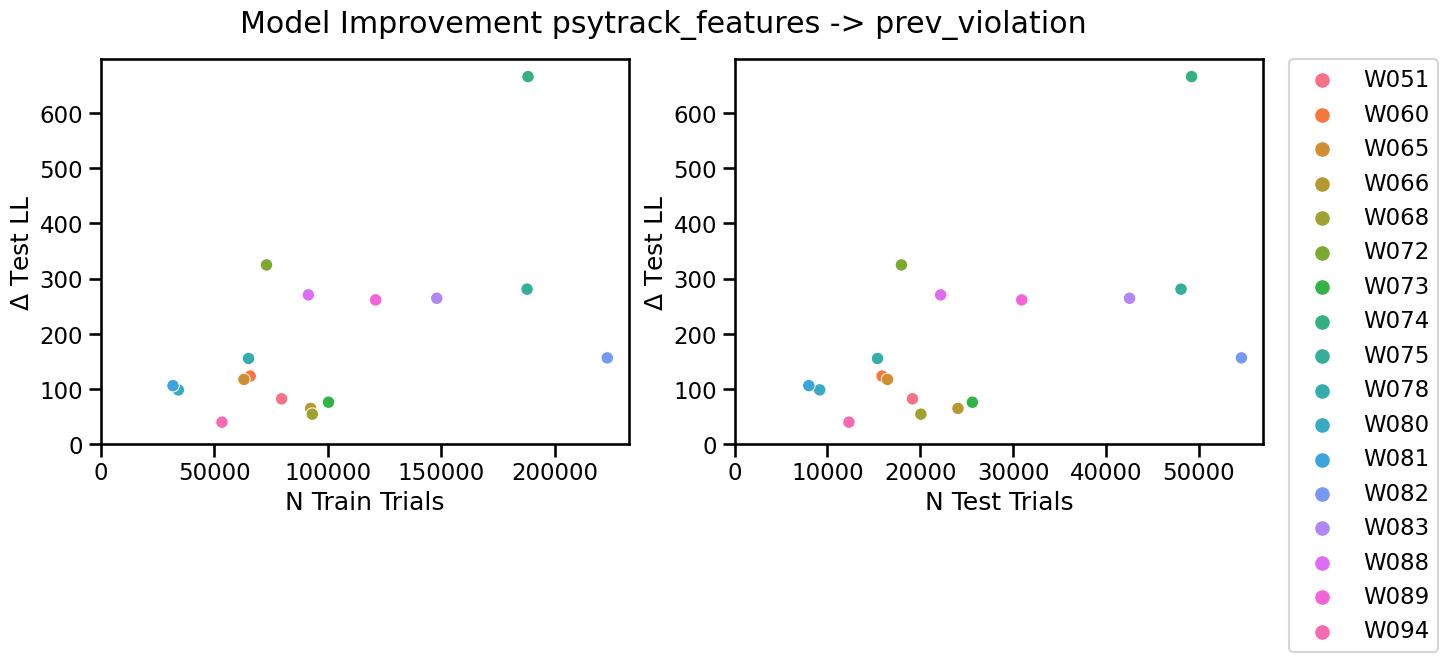

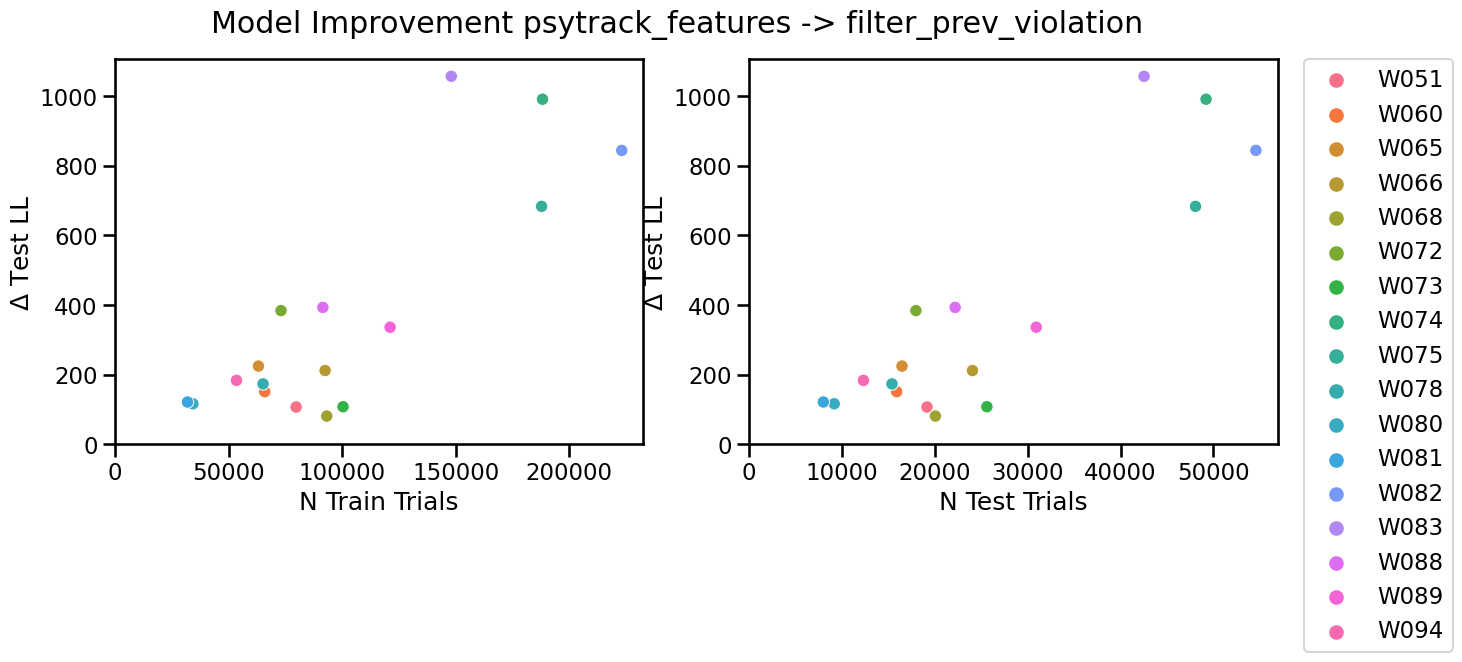

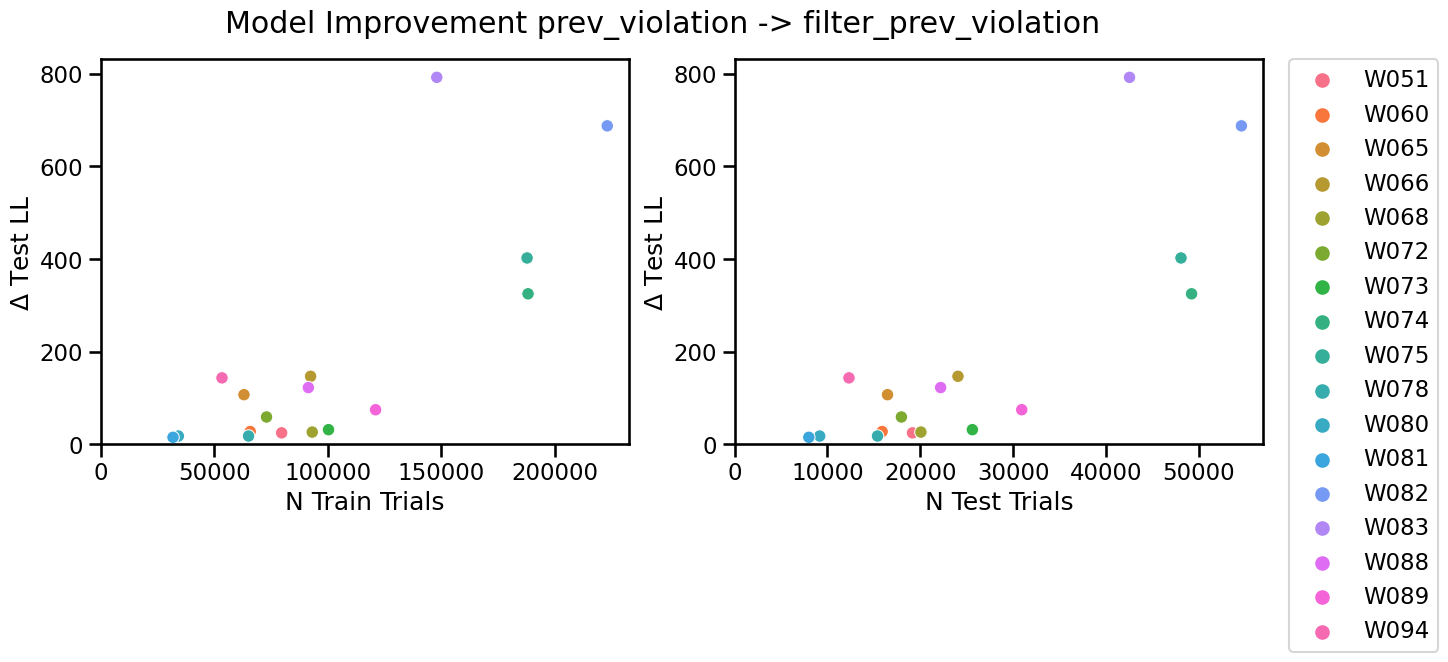

In [13]:
for i in range(len(ORDER)):
    for j in range(i + 1, len(ORDER)):
        mvc.plot_delta_ll_by_train_test_size(ORDER[i], ORDER[j])

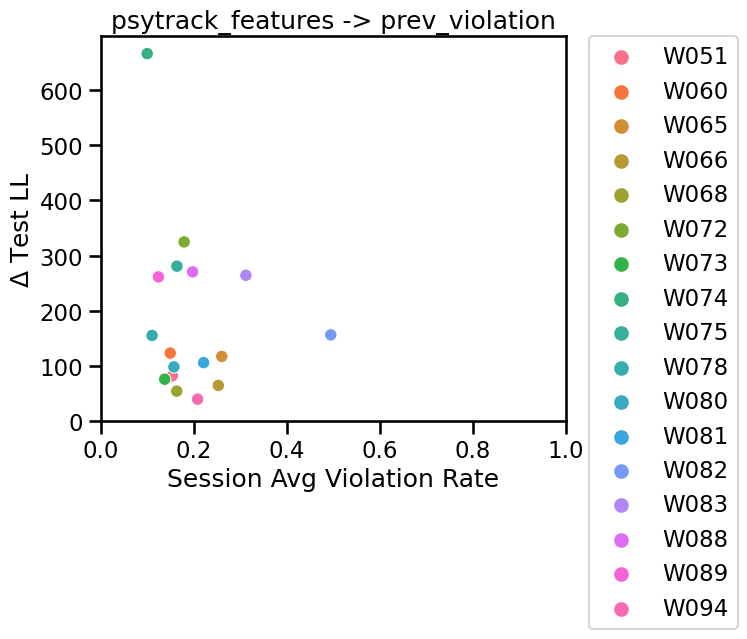

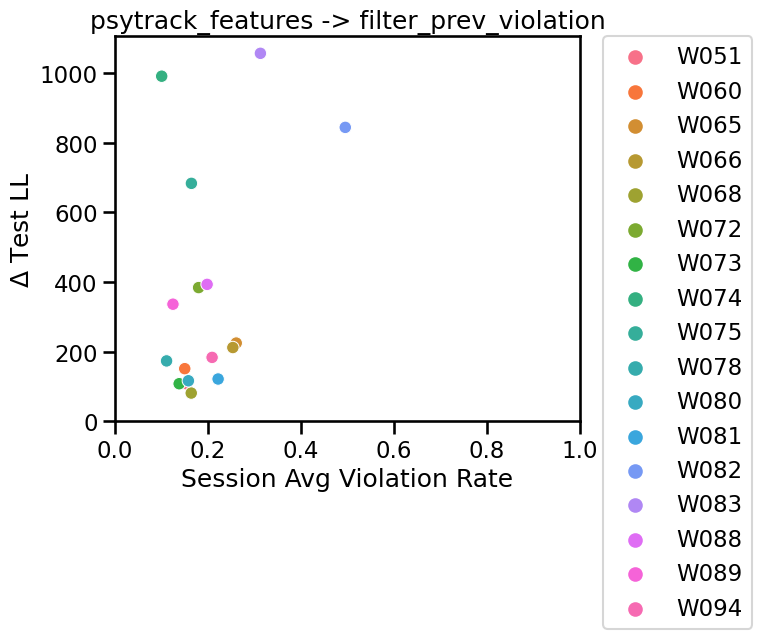

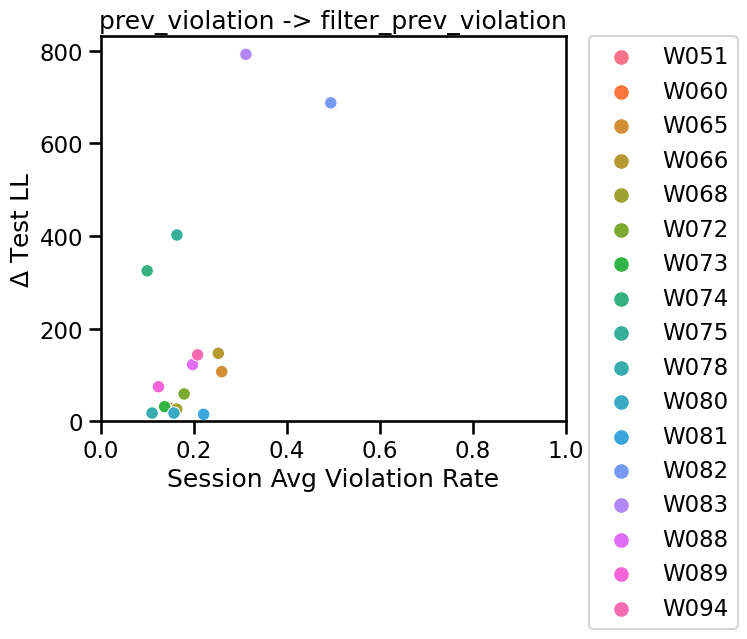

In [15]:
for i in range(len(ORDER)):
    for j in range(i + 1, len(ORDER)):
        mvc.plot_delta_ll_by_violation_rate(ORDER[i], ORDER[j])

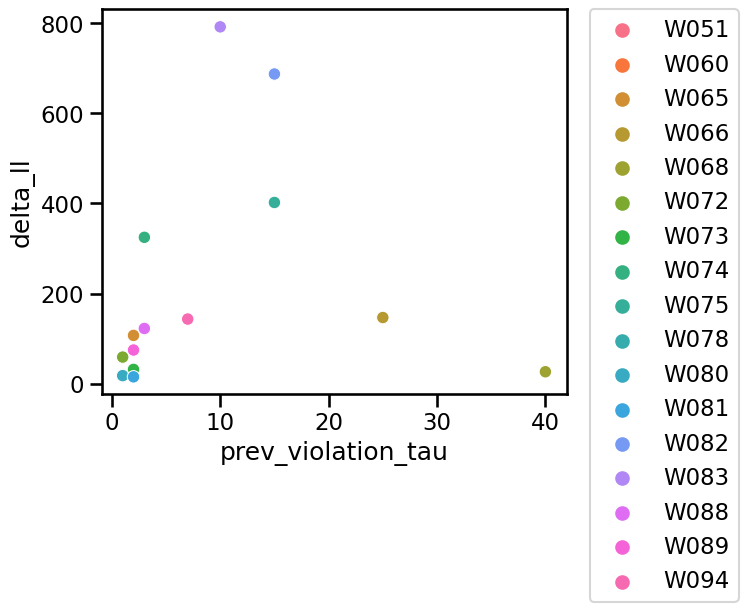

In [22]:
import pandas as pd

merged_df = pd.merge(
    mvc.compute_delta_ll_pivot(
        base_model_name="prev_violation",
        new_model_name="filter_prev_violation",
        value="nll",
    ),
    mvc.experiment.taus_df,
    on="animal_id",
)


fig, ax = plt.subplots(figsize=(6, 5))
sns.scatterplot(
    data=merged_df, x="prev_violation_tau", y="delta_ll", hue="animal_id", ax=ax
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)